# ClusterAI 2020
Ciencia de Datos - Ingenieria Industrial UTN BA
Curso I5521

## Importación de Librerias

In [1]:
#Importar paquetes de herramientas:

#Datos
import pandas as pd
import numpy as np
#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
file = 'base_estudio_discapacidad_2018.csv'

In [4]:
estudio = pd.read_csv(file, engine = 'python', error_bad_lines=False, delimiter= ';')

# Uso engine= 'python' y Erro_bad_lines = False porque sino tira un error al leer cierto tipo de lineas.

# Error_bad_lines lo uso para.Las líneas con demasiados campos (por ejemplo, una línea csv con demasiadas comas) 
# provocarán de forma predeterminada que se genere una excepción y no se devolverá ningún DataFrame. 
# Si es False, estas "líneas incorrectas" se eliminarán del DataFrame que se devuelve.

# Engine = 'python' lo uso para cuando
# Se genera una advertencia al leer un archivo que no usa el analizador 'c' predeterminado.
# Ocurre debido a la falta de soporte o funcionalidad para analizar un atributo particular de un archivo CSV con el motor solicitado.
# La advertencia se puede evitar agregando engine = 'python' como parámetro en los métodos pd.read_csv y pd.read_table .

# Uso delimiter=';' para separar las columnas al leerlas

In [5]:
# Nos quedamos con las variables/features que nos interesan del Dataset

estudio_dif = estudio[['personas_hogar', 'Sexo' , 'hogar_dificultad', 'personas_dificultad_hogar' , 'tipo_hogar' , 'edad_agrupada', 'Cantidad de dificultades' , 'Cantidad y tipo de dificultad' , 'edad_inicio' , 'Cobertura de salud' , 'Sabe leer y escribir' , 'Máximo nivel educativo alcanzado' ,'Condición de actividad']]



In [6]:
# Filtramos el Dataset por las personas con dificultades (discapacidad) que son el grupo que vamos a estudiar

estudio_disca = estudio_dif.loc[estudio['hogar_dificultad']== 'Hogares con personas con dificultad']



In [7]:
# Filtramos el Dataset por Edad y dejamos los grupos que tienen personas en edad Laboral "14 a 39 años" y "40 a 64 años"

estudio_discapacidad = estudio_disca.loc[(estudio['edad_agrupada'] != '0 a 5 años') & (estudio['edad_agrupada'] != '6 a 13 años') & (estudio['edad_agrupada'] != '65 años y más') ]

In [8]:
# Sabemos que hay valores vacios en la columna 'Condición de actividad' entonces los convertimos a Nans

estudio_discapacidad['Condición de actividad'].replace(' ', np.nan, inplace=True)


In [9]:
# Verificamos los Nans en las columnas

col_NaN = estudio_discapacidad.isnull().any()
print(col_NaN,'\r\n')

personas_hogar                      False
Sexo                                False
hogar_dificultad                    False
personas_dificultad_hogar           False
tipo_hogar                          False
edad_agrupada                       False
Cantidad de dificultades            False
Cantidad y tipo de dificultad       False
edad_inicio                         False
Cobertura de salud                  False
Sabe leer y escribir                False
Máximo nivel educativo alcanzado    False
Condición de actividad               True
dtype: bool 



In [10]:
# Limpiamos registros con '.dropna'

estudio_discapacidad.dropna(how ='any', inplace = True)

In [11]:
#Nos fijamos como quedo conformado nuestro Dataset. Cuantas muestras quedaron luego del filtro.

np.shape(estudio_discapacidad)

(4389, 13)

In [12]:
# Sabemos que hay valores vacios entonces los convertimos a Nans

estudio_discapacidad['Máximo nivel educativo alcanzado'].replace(' ', np.nan, inplace=True)
estudio_discapacidad['personas_hogar'].replace(' ', np.nan, inplace=True)
estudio_discapacidad['Sexo'].replace(' ', np.nan, inplace=True)
estudio_discapacidad['hogar_dificultad'].replace(' ', np.nan, inplace=True)
estudio_discapacidad['tipo_hogar'].replace(' ', np.nan, inplace=True)
estudio_discapacidad['edad_agrupada'].replace(' ', np.nan, inplace=True)
estudio_discapacidad['Cantidad de dificultades'].replace(' ', np.nan, inplace=True)
estudio_discapacidad['Cantidad y tipo de dificultad'].replace(' ', np.nan, inplace=True)
estudio_discapacidad['edad_inicio'].replace(' ', np.nan, inplace=True)
estudio_discapacidad['Cobertura de salud'].replace(' ', np.nan, inplace=True)
estudio_discapacidad['Sabe leer y escribir'].replace(' ', np.nan, inplace=True)


In [13]:
# Verificamos los Nans en las columnas

col_NaN = estudio_discapacidad.isnull().any()
print(col_NaN,'\r\n')

personas_hogar                      False
Sexo                                False
hogar_dificultad                    False
personas_dificultad_hogar           False
tipo_hogar                          False
edad_agrupada                       False
Cantidad de dificultades            False
Cantidad y tipo de dificultad       False
edad_inicio                          True
Cobertura de salud                  False
Sabe leer y escribir                False
Máximo nivel educativo alcanzado     True
Condición de actividad              False
dtype: bool 



In [14]:
# Rellenamos para los valores Nans de la columna 'Maximo nivel educativo alcanzado' con la leyenda 'No especifica nivel/ignorado'

estudio_discapacidad["Máximo nivel educativo alcanzado"].fillna("No especifica nivel/ignorado", inplace = True) 

# Rellenamos la columna 'edad_inicio' con la moda para los valores Nans

estudio_discapacidad['edad_inicio'] = estudio_discapacidad['edad_inicio'].fillna(estudio_discapacidad['edad_inicio'].mode()[0])

In [15]:
#Revisamos si quedaron valores nulos
nulo_ratio = (estudio_discapacidad.isnull().sum() / len(estudio_discapacidad)) * 100
nulo_ratio

personas_hogar                      0.0
Sexo                                0.0
hogar_dificultad                    0.0
personas_dificultad_hogar           0.0
tipo_hogar                          0.0
edad_agrupada                       0.0
Cantidad de dificultades            0.0
Cantidad y tipo de dificultad       0.0
edad_inicio                         0.0
Cobertura de salud                  0.0
Sabe leer y escribir                0.0
Máximo nivel educativo alcanzado    0.0
Condición de actividad              0.0
dtype: float64

In [16]:
# Nos deshacemos de la 'columna hogar_dificultad' ya qeu es igual para todas las samples

estudio_discapacidad = estudio_discapacidad.drop(['hogar_dificultad'], axis=1)

In [17]:
# Filtramos el Dataset y nos deshacemos del atributo 'Desocupado', ya que por estudios anteriores los Modelos de Clasificación no llegan a fitearlo bien debido a la baja cantidad de muestras con ente atributo

estudio_discapacidad = estudio_discapacidad.loc[(estudio['Condición de actividad'] != 'Desocupado') ]


In [18]:
ml_estudio = pd.get_dummies(estudio_discapacidad.iloc[:,1:-1])

In [19]:
ml_estudio.head(3)

,Sexo_Mujer,Sexo_Varón,personas_dificultad_hogar_1,personas_dificultad_hogar_2,personas_dificultad_hogar_3,tipo_hogar_Hogar multipersonal familiar compuesto,tipo_hogar_Hogar multipersonal familiar extendido,tipo_hogar_Hogar multipersonal familiar nuclear,tipo_hogar_Hogar multipersonal no familiar (jefes y otros no familiares),tipo_hogar_Hogar unipersonal,...,Cobertura de salud_Prepaga a través de una obra social o solo por contratación voluntaria,"Cobertura de salud_Programas o planes estatales de salud (incluir Salud, ex PROFE)",Sabe leer y escribir_No,Sabe leer y escribir_Sí,Máximo nivel educativo alcanzado_Educación integral,Máximo nivel educativo alcanzado_Hasta primario completo,Máximo nivel educativo alcanzado_No especifica nivel/ignorado,Máximo nivel educativo alcanzado_Secundario completo,Máximo nivel educativo alcanzado_Secundario incompleto,"Máximo nivel educativo alcanzado_Superior no universitario, universitario y posgrado incompleto y completo"
13,0,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
15,0,1,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
92,1,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [20]:
condicion = estudio_discapacidad.iloc[:,-1]

In [21]:
ml_estudio = pd.concat([ml_estudio, condicion], axis=1)

In [22]:
ml_estudio.head()

,Sexo_Mujer,Sexo_Varón,personas_dificultad_hogar_1,personas_dificultad_hogar_2,personas_dificultad_hogar_3,tipo_hogar_Hogar multipersonal familiar compuesto,tipo_hogar_Hogar multipersonal familiar extendido,tipo_hogar_Hogar multipersonal familiar nuclear,tipo_hogar_Hogar multipersonal no familiar (jefes y otros no familiares),tipo_hogar_Hogar unipersonal,...,"Cobertura de salud_Programas o planes estatales de salud (incluir Salud, ex PROFE)",Sabe leer y escribir_No,Sabe leer y escribir_Sí,Máximo nivel educativo alcanzado_Educación integral,Máximo nivel educativo alcanzado_Hasta primario completo,Máximo nivel educativo alcanzado_No especifica nivel/ignorado,Máximo nivel educativo alcanzado_Secundario completo,Máximo nivel educativo alcanzado_Secundario incompleto,"Máximo nivel educativo alcanzado_Superior no universitario, universitario y posgrado incompleto y completo",Condición de actividad
13,0,1,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,Inactivo
15,0,1,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,Inactivo
92,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,Inactivo
138,1,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,Inactivo
151,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,Inactivo


In [23]:
# Guardamos feature matrix en "X"
X = ml_estudio.iloc[:,0:-1]                          # slicing: todas las filas y columnas 1 a 4

# Guardamos target vector in "y"
y = ml_estudio.iloc[:,-1] 

In [24]:
print(y.shape)
print(X.shape)

(4150,)
(4150, 42)


In [25]:
# 1 - Primero creo un objeto (con determinados argumentos) que llama a la funcion que deseo
le = preprocessing.LabelEncoder()

# 2 - AL objeto le aplico la funcion fit a los datos desados 
y=le.fit_transform(y)

# 3 - Agregamos la nueva columna a nuestro data set 
ml_estudio['Encoded Condition'] = y

print('Classes:',le.classes_)
print('Response variable after encoding:',y)
ml_estudio.tail(10)

Classes: ['Inactivo' 'Ocupado']
Response variable after encoding: [0 0 0 ... 1 1 0]


,Sexo_Mujer,Sexo_Varón,personas_dificultad_hogar_1,personas_dificultad_hogar_2,personas_dificultad_hogar_3,tipo_hogar_Hogar multipersonal familiar compuesto,tipo_hogar_Hogar multipersonal familiar extendido,tipo_hogar_Hogar multipersonal familiar nuclear,tipo_hogar_Hogar multipersonal no familiar (jefes y otros no familiares),tipo_hogar_Hogar unipersonal,...,Sabe leer y escribir_No,Sabe leer y escribir_Sí,Máximo nivel educativo alcanzado_Educación integral,Máximo nivel educativo alcanzado_Hasta primario completo,Máximo nivel educativo alcanzado_No especifica nivel/ignorado,Máximo nivel educativo alcanzado_Secundario completo,Máximo nivel educativo alcanzado_Secundario incompleto,"Máximo nivel educativo alcanzado_Superior no universitario, universitario y posgrado incompleto y completo",Condición de actividad,Encoded Condition
82169,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,Ocupado,1
82192,1,0,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,Inactivo,0
82200,0,1,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,Inactivo,0
82205,0,1,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,Ocupado,1
82227,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,Ocupado,1
82234,0,1,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,Inactivo,0
82251,0,1,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,Ocupado,1
82254,0,1,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,Ocupado,1
82288,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,Ocupado,1
82289,0,1,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,Inactivo,0


In [26]:
# Step 3: separar train y test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)
#random_state: seed utilizada para poder replicar el experimento ya que la funcion tiene
#componentes aleatorios
#test_size: numero entre 0 y 1 e indicar la proporcion del dataset que va a ser test. 
print(x_train.shape)
print(y_train.shape)

(3735, 42)
(3735,)


In [27]:
# Importamos MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Definimos el escalador
scaler = MinMaxScaler()
# Fiteamos para los x_train
scaler = scaler.fit(x_train)

In [28]:
x_train_scaled = scaler.transform(x_train)  
print(x_train_scaled.mean(axis=0))
print(x_train_scaled.std(axis=0))

[0.55635877 0.44364123 0.66024096 0.26559572 0.07416332 0.01526104
 0.291834   0.60963855 0.00481928 0.07844712 0.36733601 0.63266399
 0.61419009 0.16305221 0.0896921  0.1330656  0.16305221 0.08058902
 0.1330656  0.00401606 0.00990629 0.0896921  0.25595716 0.17402945
 0.0896921  0.13815261 0.27389558 0.55287818 0.02034806 0.01472557
 0.30334672 0.43400268 0.0961178  0.1665328  0.12262383 0.87737617
 0.01981258 0.34082999 0.09959839 0.16037483 0.22864793 0.15073628]
[0.49681354 0.49681354 0.47362731 0.4416499  0.26203649 0.12258933
 0.45460633 0.48783131 0.06925353 0.26887389 0.48207911 0.48207911
 0.48678601 0.3694133  0.28574014 0.33964561 0.3694133  0.27220292
 0.33964561 0.06324504 0.09903614 0.28574014 0.43639786 0.37913481
 0.28574014 0.34506009 0.44595604 0.49719604 0.14118787 0.12045218
 0.4597037  0.49562521 0.29475273 0.37255822 0.32800492 0.32800492
 0.13935582 0.4739883  0.29946378 0.36695333 0.41996196 0.35779163]


In [29]:
x_test_scaled = scaler.transform(x_test)  
print(x_test_scaled.mean(axis=0))
print(x_test_scaled.std(axis=0))

[0.55421687 0.44578313 0.65060241 0.2746988  0.0746988  0.01686747
 0.30120482 0.6        0.00481928 0.07710843 0.34457831 0.65542169
 0.63614458 0.12048193 0.09156627 0.15180723 0.12048193 0.08192771
 0.15180723 0.00722892 0.00722892 0.10120482 0.2626506  0.17590361
 0.09156627 0.13493976 0.2746988  0.55903614 0.02168675 0.00963855
 0.33253012 0.41927711 0.08433735 0.16385542 0.09879518 0.90120482
 0.0313253  0.40481928 0.06506024 0.15180723 0.21686747 0.13012048]
[0.49705184 0.49705184 0.47677973 0.44636237 0.26290471 0.12877484
 0.45878151 0.48989795 0.06925353 0.26676342 0.47523057 0.47523057
 0.48110774 0.32552424 0.2884127  0.35883394 0.32552424 0.27425456
 0.35883394 0.08471516 0.08471516 0.30159974 0.44007416 0.38073814
 0.2884127  0.34165922 0.44636237 0.4965025  0.14565861 0.09770186
 0.47111977 0.49344079 0.27789307 0.37014433 0.29838682 0.29838682
 0.17419537 0.49085704 0.24663213 0.35883394 0.4121116  0.33643594]


In [30]:
results_df = pd.DataFrame(columns=['Model','Accuracy'])

In [31]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[1,5, 10,20,28,30,50] }
knn = KNeighborsClassifier()
clf_knn = GridSearchCV(knn, param_grid = parameters, refit = True, cv = 5)

In [32]:
clf_knn.fit(x_train_scaled, y_train.ravel())

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 5, 10, 20, 28, 30, 50]})

In [33]:
print("The best parameters are %s with a score of %0.2f" % (clf_knn.best_params_, clf_knn.best_score_))

The best parameters are {'n_neighbors': 30} with a score of 0.66


In [34]:
# Genero predicciones con mi modelo entrenado para las muestras de Test, utilizando solo Xtest
y_pred_knn = clf_knn.predict(x_test_scaled) 
print(y_pred_knn)

[0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0
 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1
 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0
 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0
 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0
 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0
 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0
 1 1 1 1 0 0 1 0]


In [35]:
# Computo el accuracy (comparar ytest vs ypred)
test_acc = accuracy_score(y_test, y_pred_knn)
print("El accuracy es " + str(test_acc))

El accuracy es 0.6626506024096386


In [36]:
#Plot Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

## RESULTADOS

In [37]:
# Accuracy en tabla
print ("Mejor accuracy para todos los modelos de Clasificación")
#Guardamos resultados
results_df = results_df.append({'Model':'KNN','Accuracy':test_acc},ignore_index=True)
results_df


Mejor accuracy para todos los modelos de Clasificación


,Model,Accuracy
0,KNN,0.662651


## Heatmap para cada Modelo

Text(0.5, 1.0, 'Confusion Matrix KNN')

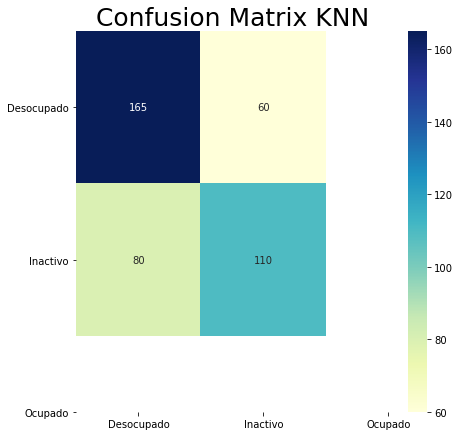

In [38]:
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

df_cm_knn = pd.DataFrame(cm_knn, index = [i for i in np.unique(y)],columns = [i for i in np.unique(y)])
plt.figure(figsize = (7,7))
x_axis_labels = ['Desocupado','Inactivo','Ocupado'] # labels for x-axis
y_axis_labels = ['Desocupado','Inactivo','Ocupado'] # labels for y-axis
ax = sn.heatmap(df_cm_knn, annot=True, fmt="d", xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap="YlGnBu")
ax.set_yticklabels (ax.get_yticklabels(), rotation=0)
plt.title("Confusion Matrix KNN",fontsize= 25)

